# Various Clustering alogorithm for Amzon fine food Review:-

In [1]:
import os
os.getcwd()

'C:\\Users\\Nicky\\Desktop\\my work\\Clustering'

In [2]:
#Importing the nessary library for this assignement .
import numpy as np
import pandas as pd
import sqlite3 as sql
from time import time
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from tqdm import tqdm

In [4]:
#Functions to save objects for later use and retireve it
def export(obj,filename):
    pickle.dump(obj,open(filename+".dmp","wb"))
def import1(filename):
    temp = pickle.load(open(filename+".dmp","rb"))
    return temp

In [5]:
#Using sqlite3 to retrieve data from sqlite file

con = sql.connect("final.sqlite")#Loading Cleaned/ Preprocesed text that we did in Text Preprocessing

#Using pandas functions to query from sql table
food1 = pd.read_sql_query("""
SELECT * FROM Reviews 
""",con)

#Reviews is the name of the table given
#Taking only the data where score != 3 as score 3 will be neutral and it won't help us much
food1.head(2)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,positive,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,b'june saw charm group rose begin droop pep ch...
1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


In [57]:
food1_sample=food1.sample(n=1000) #Taking random sample from hole dataset
food1_sample.sort_values('Time',inplace=True)
food1_sample.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
4081,232263,232264,B0000DG58Q,AY81BBSXD7T3W,Michele,0,0,positive,1074470400,PICKAPEPPA,For many years I tried various meat sauces: Am...,b'mani year tri various meat american english ...
11114,49096,49097,B0001E6D88,APNMR7J7C7H88,"KathyG ""Animal Lover""",1,1,positive,1105833600,Imperial Green Tea: Soothing - Relaxing - Grea...,"I have tried many green teas before, but this ...",b'tri mani green tea far best tast refresh not...
172814,144292,144293,B001D0AV82,A37SMD2Q6U35P0,G Jo,4,6,positive,1108080000,Average at Best,The ProFlowers One Dozen Long Stemmed Fancy Ro...,b'proflow one dozen long stem fanci rose red r...
393497,24759,24760,B0097KJ6ZY,AUDO0LW4G2U49,Cecilia Fox,4,4,positive,1119225600,I balled like a baby when I got this,My kids sent me this gift for my birthday last...,b'kid sent gift birthday last week practic sti...
6685,271598,271599,B0000TU8VM,ARNTC51UO46QP,N. Klima,1,2,positive,1120867200,sweet and spicy!,We recently tasted these delicious little pepp...,b'recent tast delici littl pepper local grocer...


In [58]:
CLEANED_TEXT = food1_sample['CleanedText'].values
print("Dataset Shape : \n",CLEANED_TEXT.shape)

Dataset Shape : 
 (1000,)


# ------------:Functions For K Means :--------------

# Elbow method for finding Best clusters K

In [127]:
# To find K of K-means using elbow method.
# This fn plots the loss vs k graph to find the elbow point
kcluster=[int(i) for i in range(10, 201,10)]
def findbestK(vecotor):
    out = {}
    for k in tqdm(kcluster):
        kalogo = KMeans(n_clusters=k,n_jobs=-1,n_init=5)
        kalogo.fit(vecotor)
        # Inertia: Sum of distances of samples to their closest cluster center
        out[k] = kalogo.inertia_
    #print(out)
    plt.figure()
    plt.plot(list(out.keys()), list(out.values()),'bx-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Loss Value")
    plt.title('The optimal k value using Elbow methd')
    plt.grid()
    plt.show()

# Printing the cluster review

In [131]:
def print_reviews(kalogo,cluster_number = 0,review_count=3):
    cluster_label = dict()
    for i in range(0,kalogo.n_clusters):
        cluster_label[i] = []
    for i in range(kalogo.labels_.shape[0]):
        txt = list()
        txt.append(CLEANED_TEXT[i]) 
        temp = cluster_label[kalogo.labels_[i]] + txt
        cluster_label[kalogo.labels_[i]]=temp
    reviews = cluster_label[cluster_number]
    reviews = reviews[0:review_count]
    print("---: Cluster No:- {} :---".format(cluster_number))
    index = 1
    for review in reviews:
        print("Review {} : ".format(index))
        print(review)
        print()
        index += 1

In [136]:
def get_cluster(kalogo):
    cluster_review = dict()
    for i in range(0,kalogo.n_clusters):
        cluster_review[i] = []
    for i in range(kalogo.labels_.shape[0]):
        txt = list()
        txt.append(CLEANED_TEXT[i]) 
        temp = cluster_review[kalogo.labels_[i]] + txt
        cluster_review[kalogo.labels_[i]]=temp
    return cluster_review    

In [44]:
from wordcloud import WordCloud, STOPWORDS
def print_word_cloud(review):
    b=str(review).strip('[]')
    wordcloud = WordCloud(stopwords = set(STOPWORDS), 
                background_color ='white',min_font_size = 10,width = 300, height = 300).generate(b)                              
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# vectorization

# BAG OF WORDS

In [135]:
bi_gram = CountVectorizer() 
X = bi_gram.fit_transform(CLEANED_TEXT)

100%|█████████████████████████████████████████| 9/9 [1:44:56<00:00, 746.23s/it]


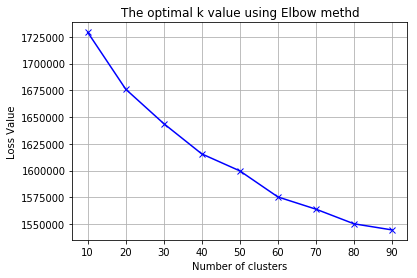

In [10]:
findbestK(X)

From the above grap we can able to see some steepness at 80 , so let's take 80 as optimal K.

In [137]:
%%time
#perfom K means for interpreting if we getting correct cluster or not
kalogo=KMeans(n_clusters=80,n_jobs=-1,n_init=5)
kalogo.fit(X)
kalogo

Wall time: 8min 34s


In [139]:
cluster_number = 15
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 15 :---
Review 1 : 
b'celesti season plump bag fresh tasti peppermint leaf brew clean delici cup tea peppermint one enjoy herbal tea natur sweet clean tast peppermint herb mani use tradit herbal medicin reput relax muscl digest system help reliev nausea peppermint combat flatul promot bile flow digest juic mild anesthet effect also eas indigest suppos reliev anxieti tension sooth headach calm symptom associ menstrual cycl celesti season get extra point util natur recycl paperboard box dont packag tea bag individu instead use system wax paper bag insid box stay shut fold keep bag fresh util less packag individu wrap bag art use box beauti quot inform put everi surfac'

Review 2 : 
b'tea smell like lemon sour great fragranc auburn shade brew tast lemoni slight hint lemon peel bitter imagin would tast good sweeten pretti good not favorit celesti season get extra point util natur recycl paperboard box dont packag tea bag individu instead use system wax paper bag insid box

In [140]:
cluster_review=get_cluster(kalogo)

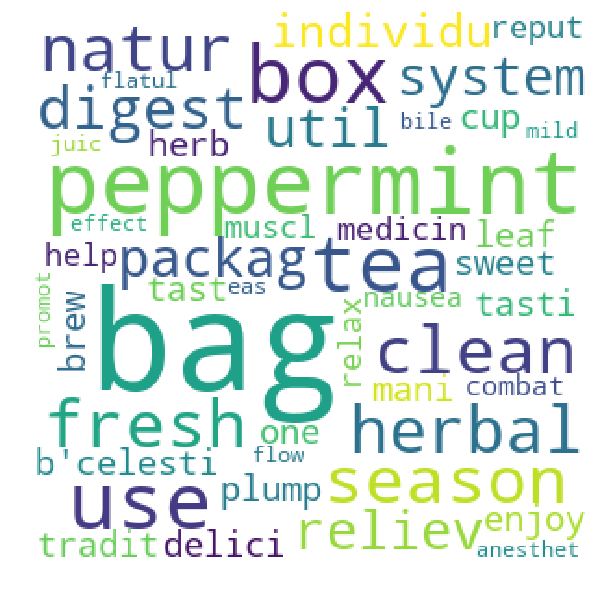

In [154]:
print_word_cloud(cluster_review[cluster_number][0:1])

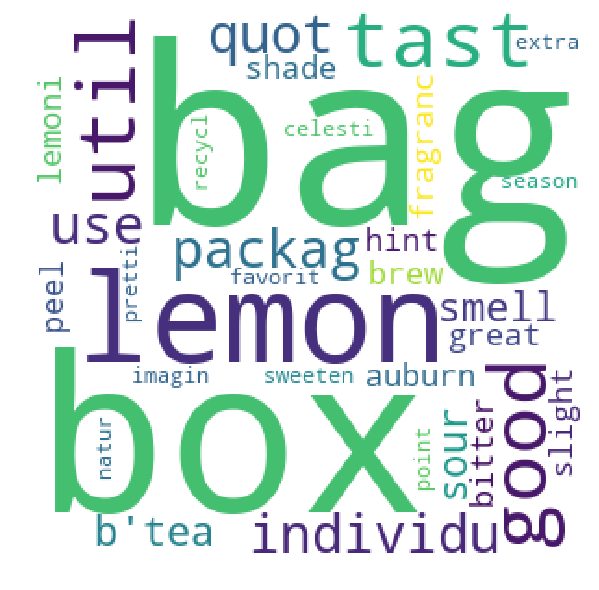

In [155]:
print_word_cloud(cluster_review[cluster_number][1:2])

---------From the above cluster reviw we can able to find that cluster is for Tea-------

In [106]:
cluster_number = 25
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 25 :---
Review 1 : 
b'year tri simul truli italian espresso cappuccino without success sever packag arriv christma son sent briel cadiz espresso machin two love russian china cup case espression classic espresso pod kindest wonder christma present rememb espresso machin excel qualiti eas use espresso exquisit time prepar espresso cappuccino experi son love kind small part mani gift itali heaven earth'

Review 2 : 
b'surpris rate chees favorit chees love chees kind real parmigiano reggiano delici love characterist amino acid crunch littl white spot crystal amino acid produc ripen process even though pound grate last long time sad may discov real parmesan eaten chunk like good chocol thus pound melt away like snow good'



---------From the above cluster reviw we can able to find that cluster is for chocolate-------

# TFIDF:--

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer()
X = tfidf_vec.fit_transform(CLEANED_TEXT)

100%|█████████████████████████████████████████| 9/9 [1:35:47<00:00, 711.34s/it]


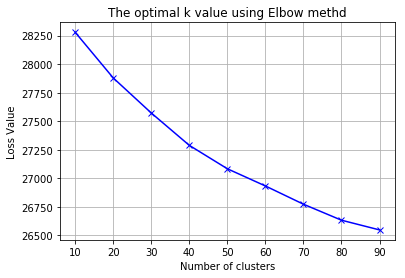

In [89]:
findbestK(X)

In [158]:
%%time
#perfom K means for interpreting if we getting correct cluster or not
kalogo=KMeans(n_clusters=80,n_jobs=-1,n_init=5)
kalogo.fit(X)
kalogo

Wall time: 6min 8s


In [159]:
cluster_number = 30
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 30 :---
Review 1 : 
b'purchas websit state made banana honey read fine print find also contain ad sugar banana flavor coconut oil dont even tast like banana ad ingredi expect'

Review 2 : 
b'consist excel coconut milk great abl purchas bulk amazon'



------The Above cluster is for Chees-------------

In [160]:
cluster_number = 10
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 10 :---
Review 1 : 
b'noodl littl hard take begin rubberi would best describ howev season key serv grate parmesan imit parmesan tomato sauc oliv oil littl garlic delici meal godsend peopl must watch calori care still crave eat food beyond veget someon alway watch weight strong recommend give chanc fact good health anoth plus tri whole food wild natur less'

Review 2 : 
b'daughter cant metabol protein correct special nutritionist provid pretzel low protein food far favorit share ladi church glutein free diet like warn food though not typic favorit brand'



In [161]:
cluster_review=get_cluster(kalogo)

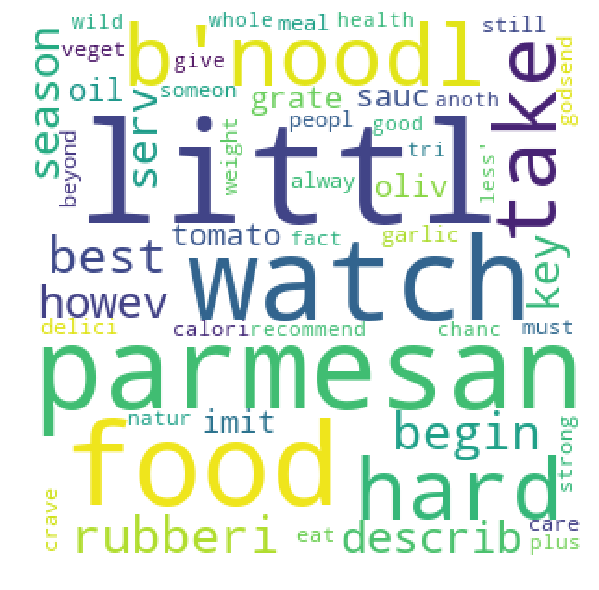

In [162]:
print_word_cloud(cluster_review[cluster_number][0:1])

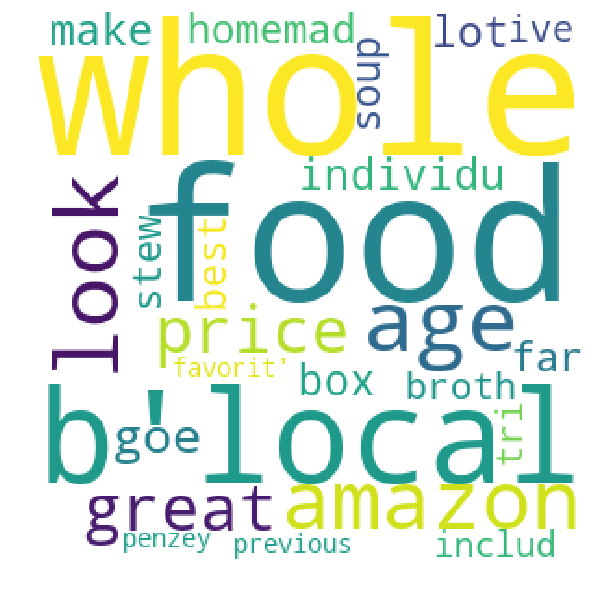

In [163]:
print_word_cloud(cluster_review[cluster_number][11:12])

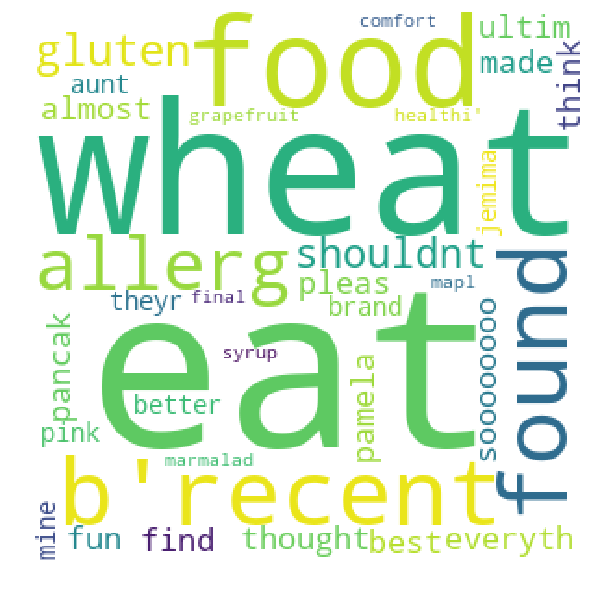

In [165]:
print_word_cloud(cluster_review[cluster_number][2:3])

# AVG W2v

In [8]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
stop.remove('not')
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"isn't", 'herself', 'was', 'being', "don't", 'are', "won't", 'o', "wasn't", 'weren', 'then', 'both', 'ma', 'd', 'isn', 'above', 'i', "shan't", 'off', 'you', 'where', 'own', 'will', 'of', 'it', 'through', 'its', 'should', "mightn't", 'she', 'do', 'to', 'but', "that'll", 'when', 'all', 'here', 'from', 'him', 'so', 'about', 'before', 'am', 'until', 'won', 'that', 'aren', 'your', 'my', 'same', 'hadn', 'too', 'shouldn', 'who', 've', 's', "you'll", 'further', 'himself', 'her', 'were', 'only', 'between', "hadn't", 'in', "you're", 'those', 'have', 'has', 'while', 'theirs', "haven't", 'just', 'don', 'me', 'ain', 'be', 'if', "she's", "didn't", 'a', 'out', 'did', 'after', 'any', 't', 'having', 'very', 'on', 'with', 'most', 'themselves', 'doing', 'them', 'other', 'can', 'the', 'had', 'is', "weren't", 'by', 'over', 'up', 'm', 'y', 'hasn', 'shan', 'during', 'ours', 're', 'yourselves', "you'd", 'does', "wouldn't", 'why', 'there', "should've", 'now', 'because', 'been', 'needn', 'more', "aren't", 'our

In [167]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in food1_sample['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [169]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████| 20000/20000 [00:20<00:00, 981.06it/s]


20000
300
Wall time: 20.4 s


In [170]:
sent_vectors = np.array(sent_vectors)

In [171]:
np.isnan(sent_vectors).any()

False

100%|████████████████████████████████████████████| 9/9 [11:54<00:00, 92.58s/it]


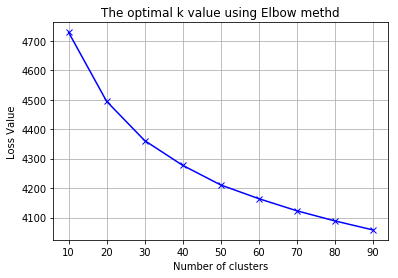

In [113]:
findbestK(sent_vectors)

In [172]:
%%time
#perfom K means for interpreting if we getting correct cluster or not
kalogo=KMeans(n_clusters=40,n_jobs=-1,n_init=5)
kalogo.fit(sent_vectors)
kalogo

Wall time: 41.4 s


In [175]:
cluster_number = 12
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 12 :---
Review 1 : 
b'wow stuff good order learn use make offici drink rhode island coffe milk made corn syrup coffe caramel color tast good make coffe milk simpli stir teaspoon glass milk syrup also serv ice cream use make coffe milkshak also tri autocrat syrup famili own busi sinc lead produc coffe syrup one largest coffe roaster new england'

Review 2 : 
b'medaglia doro instant espresso coffe far best way make latt comfort home also cheapest use make awesom vanilla latt put two spoon medaglia doro espresso coffe cup add shot hot water mix place shot vanilla syrup tall glass less accord individu tast next add enough cube fill glass way fill glass enough cold milk cover ice pout hot coffe mix milk ice stir vigor mix add ice need pour enough half half color coffe mix yummi caramel color delici cheaper espresso stand ingredi hand medaglio also great recip call instant espresso not store carri product order gristed amazon com'



In [176]:
cluster_review=get_cluster(kalogo)

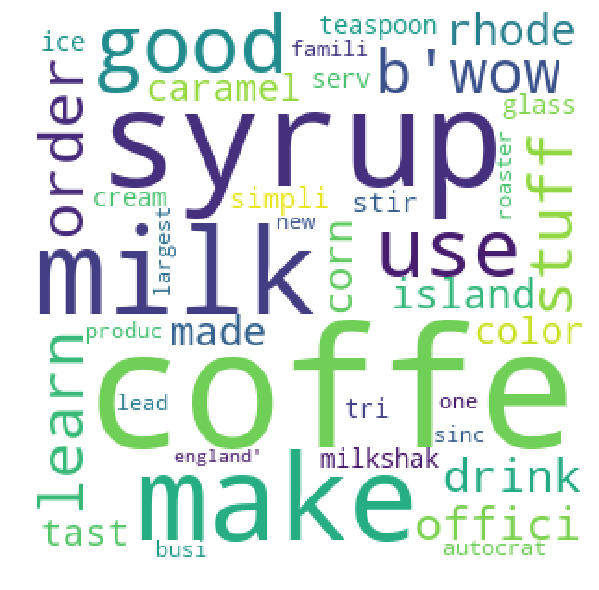

In [177]:
print_word_cloud(cluster_review[cluster_number][0:1])

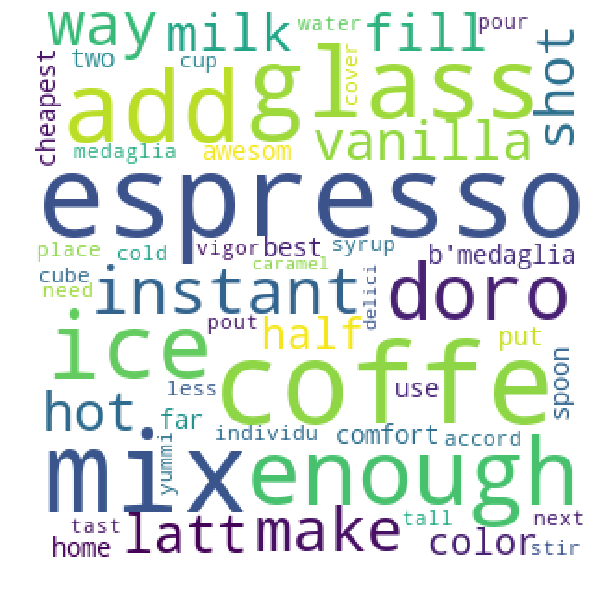

In [178]:
print_word_cloud(cluster_review[cluster_number][1:2])

# Tf-IDF W2V

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() #Using bi-grams
tfidf_vec = tfidf.fit_transform(food1_sample['Text'].values)

In [180]:
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

In [181]:
%%time
# TF-IDF weighted Word2Vec
# tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            #print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*sent.count(word)
            #print()
            sent_vec += (vec * tf_idf)
            #print(sent_vec)
            #print(tfidf)
            #print(sent_vec)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1  

100%|███████████████████████████████████| 20000/20000 [00:33<00:00, 595.06it/s]


Wall time: 33.6 s


In [182]:
tfidf_sent_vectors = np.array(tfidf_sent_vectors)

In [183]:
np.isnan(tfidf_sent_vectors).any()

False

100%|█████████████████████████████████████████| 20/20 [39:53<00:00, 176.81s/it]


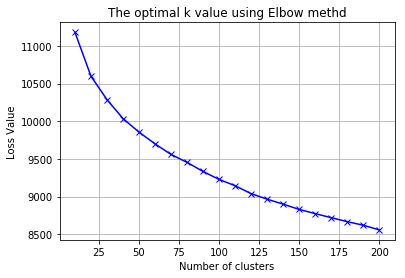

In [17]:
findbestK(tfidf_sent_vectors)

In [184]:
%%time
#perfom K means for interpreting if we getting correct cluster or not
kalogo=KMeans(n_clusters=40,n_jobs=-1,n_init=5)
kalogo.fit(tfidf_sent_vectors)
kalogo

Wall time: 35 s


In [187]:
cluster_number = 6
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 6 :---
Review 1 : 
b'gluten three month although get use depriv favorit dessert not make fun pamela product far best gluten free desert around browni best unlik gluten free product dens dri browni moist light delici even peopl gluten love product'

Review 2 : 
b'bar one favorit lowest calori larabar cherri pie bar contain date almond unsweeten cherri total calori total fat sodium total carb fiber sugar'



In [188]:
cluster_number = 20
review_count = 2
print_reviews(kalogo,cluster_number = cluster_number, review_count = review_count)

---: Cluster No:- 20 :---
Review 1 : 
b'even though write review most favorit type escap novel spark amazon enthusiasm take part groceri store gourmet food expans first purchas product beyond book includ grain call quinoa keenwa super saver ship product arriv good order within perfect time maiden purchas includ novel cours cleo coyl latest coffeehous mysteri murder frothi also ad lavend clove essenti oil shop cart along powder clove lavend tea see listmania essenti oil indic item ive review info valu use lavend clove avail various vendor consid quinoa valuabl food avail planet food meet standard luxuri gourmet flavor culinari versatil addit baselin healthi nourish limit item food group addit water cours eat drink would quinoa coffe dairi product varieti green spice nut yeah okay dairi green spice nut may consid item theyr two categori not vegetarian love meat chicken fish work limit make basic basic still enough food item concoct satisfi flavor yeah yeah nutrit though accord belief nut

In [189]:
cluster_review=get_cluster(kalogo)

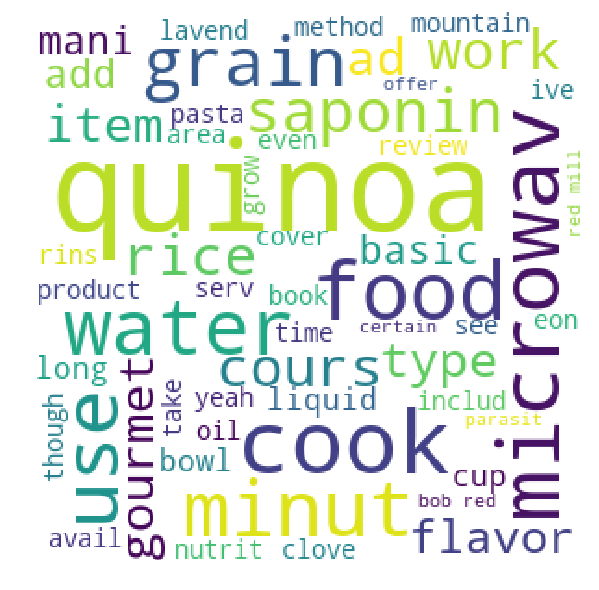

In [190]:
print_word_cloud(cluster_review[cluster_number][0:1])

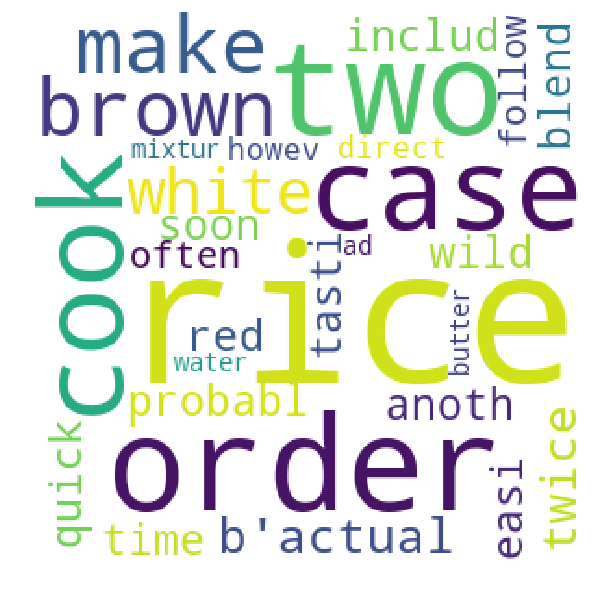

In [191]:
print_word_cloud(cluster_review[cluster_number][1:2])

# ------------:Functions For HIERARCHICAL CLUSTERING :--------------

AgglomerativeClustering with 2 clusters----

In [197]:
from sklearn.cluster import AgglomerativeClustering
Hierarchical_clust2=AgglomerativeClustering(n_clusters=2)

AgglomerativeClustering with 5 clusters----

In [198]:
Hierarchical_clust5=AgglomerativeClustering(n_clusters=5)

In [199]:
Hierarchical_clust2.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x0000000004E1D488>)>

In [200]:
Hierarchical_clust5.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000000004E1D488>)>

In [201]:
def clusters2(aolgo):
    clus1 = []
    clus2 = []
    for i in range(aolgo.labels_.shape[0]):
        if aolgo.labels_[i] == 0:
            clus1.append(CLEANED_TEXT[i])
        else :
            clus2.append(CLEANED_TEXT[i])
    return clus1,clus2

In [202]:
def clusters5(aolgo):
    clus1 = []
    clus2 = []
    clus3 = []
    clus4 = []
    clus5 = []
    for i in range(aolgo.labels_.shape[0]):
        if aolgo.labels_[i] == 0:
            clus1.append(CLEANED_TEXT[i])
        elif aolgo.labels_[i] == 1:
            clus2.append(CLEANED_TEXT[i])
        elif aolgo.labels_[i] == 2:
            clus3.append(CLEANED_TEXT[i])
        elif aolgo.labels_[i] == 3:
            clus4.append(CLEANED_TEXT[i])
        else :
            clus5.append(CLEANED_TEXT[i])
    return clus1,clus2,clus3,clus4,clus5

# BAG OF WORDS

In [192]:
food1_sample=food1.sample(n=5000) #Taking random sample from hole dataset
food1_sample.sort_values('Time',inplace=True)

In [193]:
CLEANED_TEXT = food1_sample['CleanedText'].values
print("Dataset Shape : \n",CLEANED_TEXT.shape)

Dataset Shape : 
 (5000,)


In [194]:
bi_gram_hi = CountVectorizer() 
X = bi_gram_hi.fit_transform(CLEANED_TEXT)

In [110]:
X.shape

(5000, 9676)

In [195]:
#As it reqruire dense matrix to work so need to convert the space matrix to to_array
X=X.toarray()

In [203]:
%%time
Alogo2 = Hierarchical_clust2.fit(X)

Wall time: 3min 23s


In [204]:
clus1,clus2=clusters2(Alogo2)

cluster1 : 

Review 1 : b'not quit bad expect strawberri delight flavor frost suffer look unnatur pink color dy wheat biscuit way make wholli unappet otherwis offer sweeten tast bare remind real strawberri least point wonder point variat kellogg one serv equal calori five fat good news measur sodium cholesterol cereal would think ad real strawberri even dri berri variat would prefer cereal think ill leav pass'


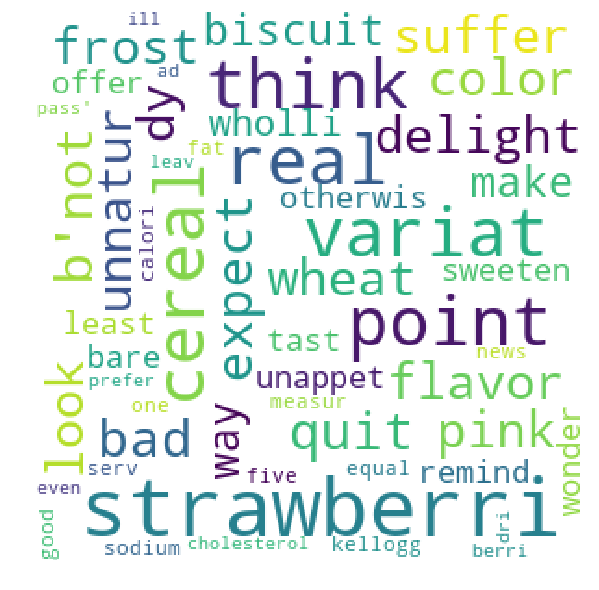

---------------------------------------------------------------------------------------------------
Review 2 : b'tazo calm herbal infus nice chamomil tea tast chamomil flavor not unpleas hard pin besid chamomil general not big fan tea flavor ad prefer subtl authent tast real thing ingredi calm chamomil flower hibiscus flower spearmint lemongrass rose petal blackberri leav safflow peppermint sarsaparilla lemon balm licoric natur flavor tazo interest compani make super premium tea social respons base portland motto reincarn tea tazo own starbuck web site fun quirki focus definit worth check unclear though web site mani ingredi organ kosher use natur flavor word seem littl vagu super premium tea paper tea packet tazo write sooth blend chamomil blossom relax herb web site tazo describ flavor profil calm creami floral minti toasti sweet name gentl impli tazo calm love floral bouquet flavor distinct toasti note natur sweet nice light way smooth finish tazo describ aroma minti hay like rose d

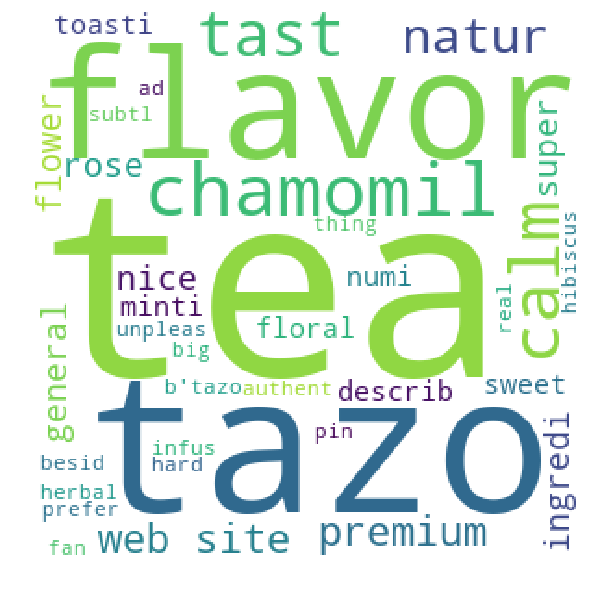

---------------------------------------------------------------------------------------------------


In [206]:
print("cluster1 : \n")
count=1
for review in clus1[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

cluster2 : 

Review 1 : b'web site say deliv hour wait day product yet ship amazon ship soon design imposs cancel order current estim receiv order day product stock ship hour today receiv notif problem order inform problem dishonest merchant'


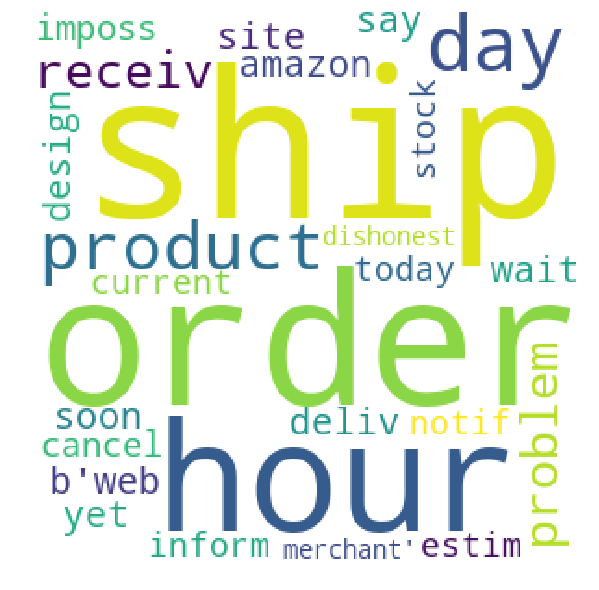

---------------------------------------------------------------------------------------------------
Review 2 : b'recent bought power buttermilk ship fast product look could not find power buttermilk store close feed babi puppi'


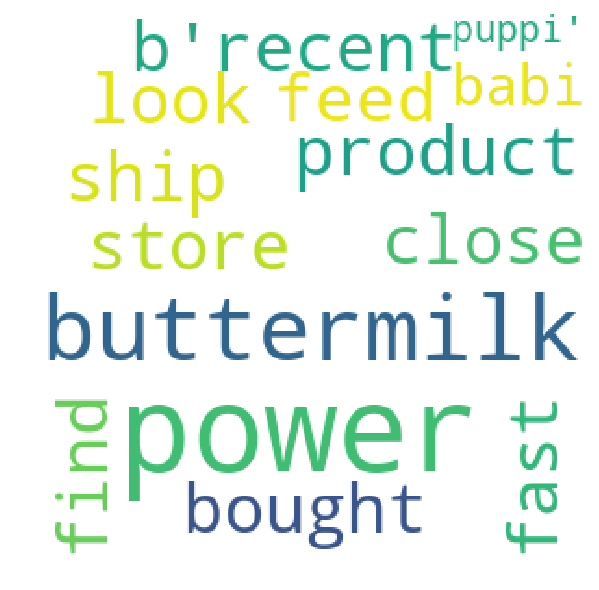

---------------------------------------------------------------------------------------------------


In [207]:
print("cluster2 : \n")
count=1
for review in clus2[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

In [208]:
%%time
Alogo5=Hierarchical_clust5.fit(X)

Wall time: 3min 26s


In [209]:
clus1,clus2,clus3,clus4,clus5=clusters5(Alogo5)

cluster3 : 

Review 1 : b'year tea lover usa resort import dilmah probabl finest world revolutionis domest tea market australia introduc twenti year ago beauti fresh vacuum pack tea finest leaf rich satisfi fair trade among tea connoisseur dilmah institut regular tea compani purchas product not indulg ultim experi youll also help multitud programm institut dilmah enlighten manag product like favour buy today'


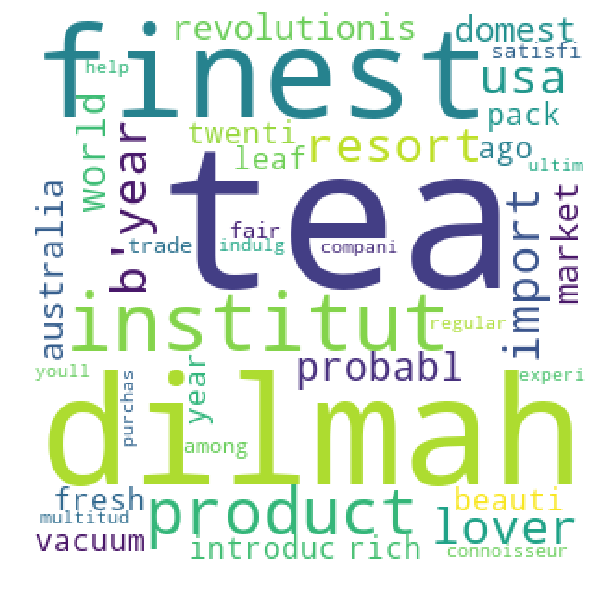

---------------------------------------------------------------------------------------------------
Review 2 : b'hojicha delici everi day tea mighti leaf bag especi nice theyr silken wont impart paper flavor brew hunt tea suffer mani terribl decaf black tea true hojicha bit caffein decaf tea consid flavor nice subtl smoki not even hint bitter cant realli back sometim decaffein let steep second hot water toss brew drink second infus ive read caffein come initi steep lose littl flavor still much tastier commerci decaf ive ever'


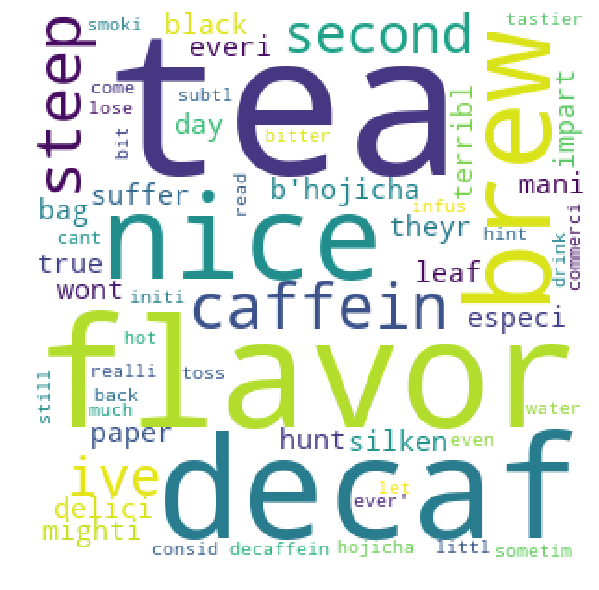

---------------------------------------------------------------------------------------------------


In [210]:
print("cluster3 : \n")
count=1
for review in clus3[15:17]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# TFIDF

In [211]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer()
X = tfidf_vec.fit_transform(CLEANED_TEXT)

In [212]:
X=X.toarray()

In [213]:
%%time
Alogo2 = Hierarchical_clust2.fit(X)

Wall time: 3min 23s


In [214]:
clus1,clus2=clusters2(Alogo2)

cluster1 : 

Review 1 : b'one tea coke wine milk beer type peopl basic realli dont like drink water chore anyth think theyr kid smartwat goe easili tast good afterward crisp cool even someth tast cool dont know tri said may turn one peopl'


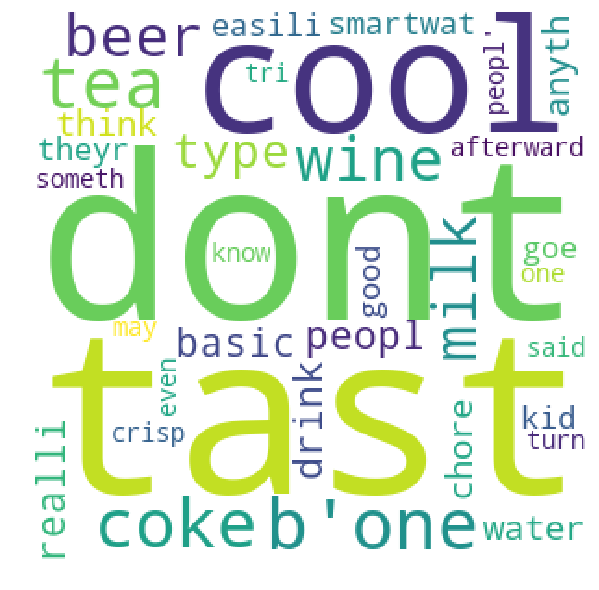

---------------------------------------------------------------------------------------------------
Review 2 : b'not heard orangina recent found refresh drink although bit pricey make nice treat probabl not everi day event'


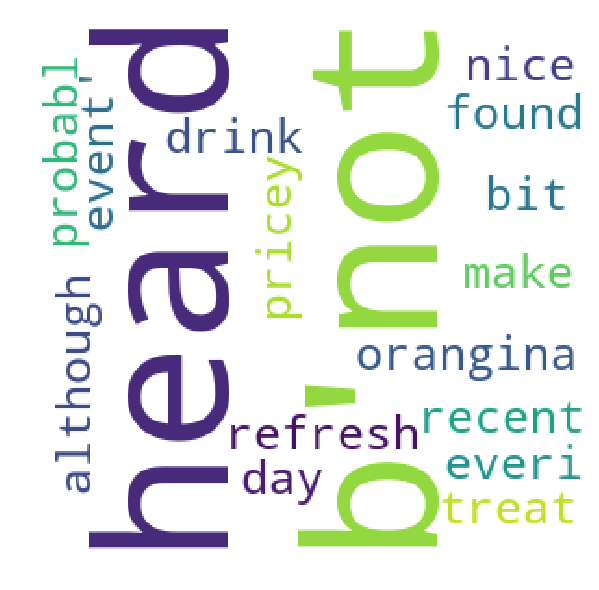

---------------------------------------------------------------------------------------------------


In [215]:
print("cluster1 : \n")
count=1
for review in clus1[5:7]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

In [216]:
%%time
Alogo5 = Hierarchical_clust5.fit(X)

Wall time: 3min 26s


In [217]:
clus1,clus2,clus3,clus4,clus5=clusters5(Alogo5)

cluster2 : 

Review 1 : b'dog eat anyth select eater reject treat weve tri picki pooch went hoard mode treat ran crate ate privaci away two dog came back ask say success typic tri avoid treat dog food sort corn product mani spice bit turn read corn syrup list pretti high ingredi could wors occasion treat area actual pretti high end big treat thing realli concern waft chemic smell got open bag not sure fault packag product day sinc weve given treat dog advers side affect think might packag mayb liquid smoke unnatur smell dont know dog didnt mind piec realli big cut third two small dog give whole thing bigger dog'


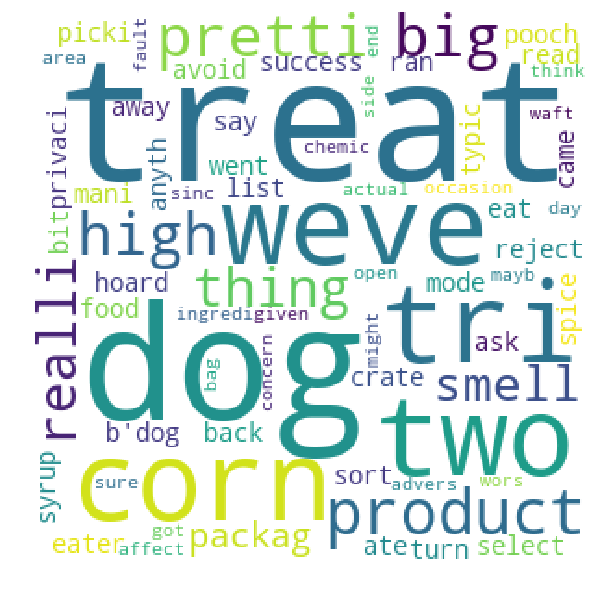

---------------------------------------------------------------------------------------------------
Review 2 : b'spirit help children learn healthier eat not necessarili mean treat got coupl buy get deal local store pack lunch differ day treat request ever sinc tast delici accord kid mom like much healthi standard corn syrup laden fruit treat typic market kid tri clif first rave review move say lot children treat among first compli california strict law problem keep stock pantri occasion treat kid problem eat'


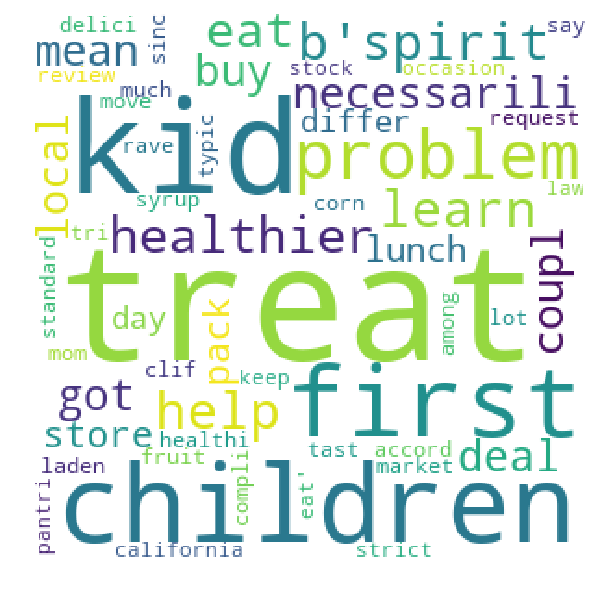

---------------------------------------------------------------------------------------------------


In [218]:
print("cluster2 : \n")
count=1
for review in clus2[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

cluster4 : 

Review 1 : b'brew weak tea prefer tazo bigelow brand bought tea amazon not buy'


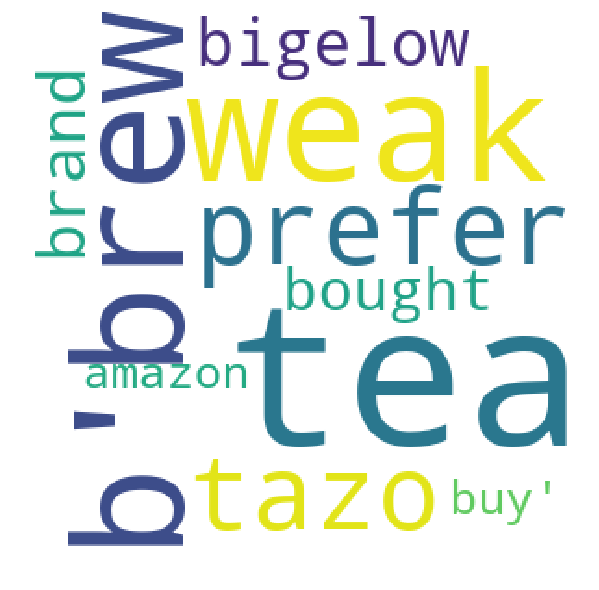

---------------------------------------------------------------------------------------------------
Review 2 : b'take two earl grey green tea bag two regular green tea tea bag one doubl bergamot tea bag one lusiann famili size tea bag dump content coffe maker fill level shave lemon zest top loos tea pour finish tea contain fill top water benefit green tea plus tast black tea ratio stand quit well lot ad ice'


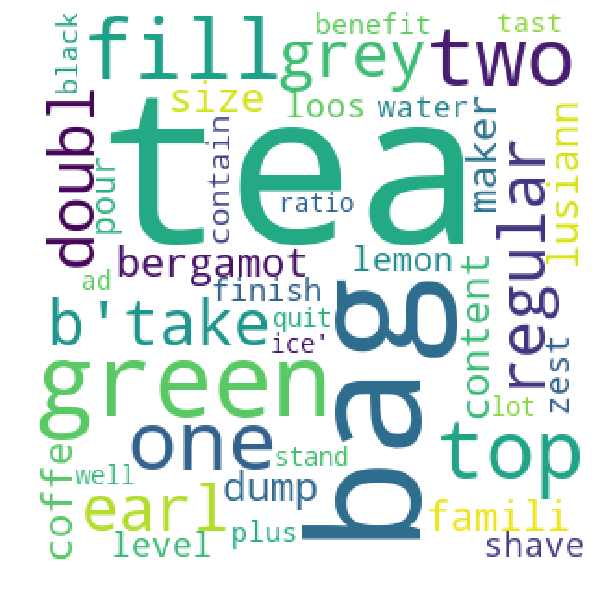

---------------------------------------------------------------------------------------------------


In [223]:
print("cluster4 : \n")
count=1
for review in clus4[5:7]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

cluster1 : 

Review 1 : b'head review pretti much gist cat would come run stuff pretti much would lick gravi leav food say tend eat sear fillet fine cut rate star seem averag cat food cat like wont recommend buy loos pouch local grocer first see like buy pack'


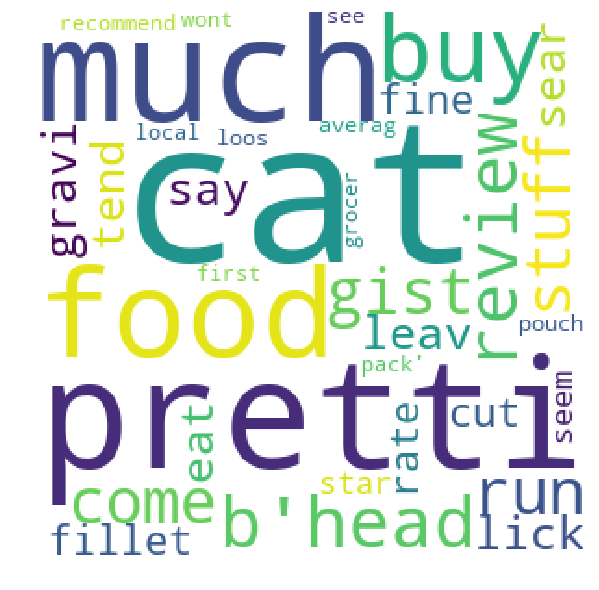

---------------------------------------------------------------------------------------------------
Review 2 : b'got sampl treat box litter order internet offer corey cat downfal eat practic noth els crunch ecstat whine butt head cabinet door kept dish empti'


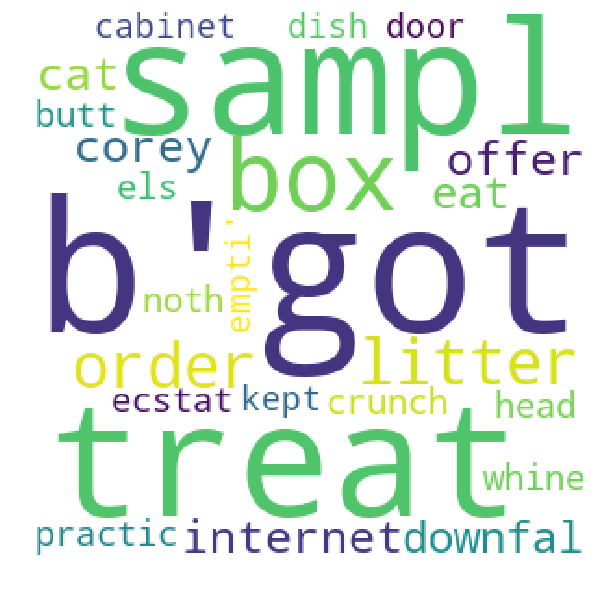

---------------------------------------------------------------------------------------------------


In [222]:
print("cluster1 : \n")
count=1
for review in clus5[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# AVG W2v

In [224]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in food1_sample['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [225]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████| 5000/5000 [00:05<00:00, 951.96it/s]


5000
300
Wall time: 5.27 s


In [226]:
%%time
Alogo2 = Hierarchical_clust2.fit(sent_vectors)

Wall time: 7.84 s


In [227]:
clus1,clus2=clusters2(Alogo2)

cluster1 : 

Review 1 : b'year old cocker spaniel treat chronic ear paw yeast infect past year hes chronic stinki black gunk ear black waxi substanc cover toe would guess ive spent thousand dollar vet visit test shampoo ear medic wipe antibiot name none work week vet even tri new process dog ear fill type medic everi week vet week coupl month improv poor dog scratch raw spent much day lick dig paw scratch sore smelli ear recent ive bath everi day malaseb shampoo seem help stand minut shampoo cover medic could rins skin poor littl dog trip florida took spaniel new vet prescrib ear drop wipe shampoo attempt help dog vet ask ever tri chang food eukanuba hes sinc puppi vet ever mention dog could allerg food seem simpl found natur balanc sweet potato venison petco thought tri food trial differ two week sinc hes dog food yeast infect appear gone ear clear discharg irrit skin paw start look pink healthi cant believ differ short time hes not scratch either florida vet said food trial would req

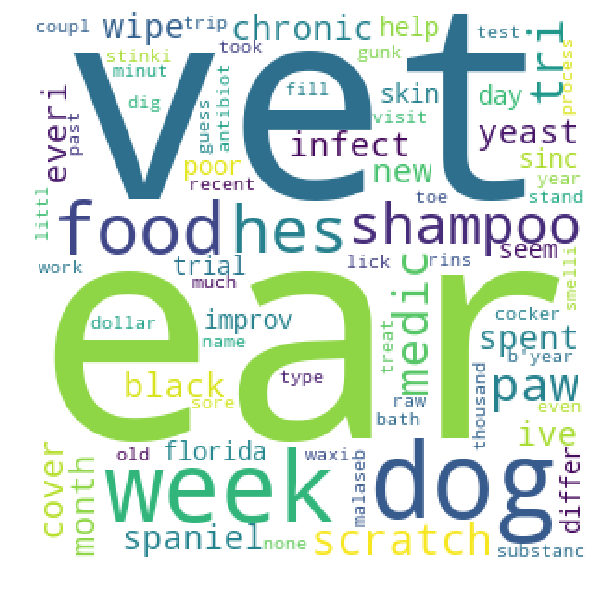

---------------------------------------------------------------------------------------------------
Review 2 : b'usual wait buy woodman great price make decent dough usual make pizza everi coupl week get littl soggi dont take care stretch thin pizza pan also time usual let sit minut instead minut recommend direct'


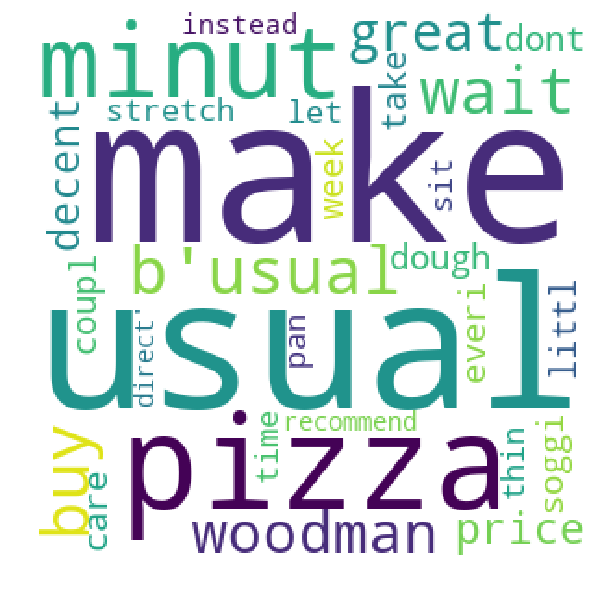

---------------------------------------------------------------------------------------------------


In [228]:
print("cluster1 : \n")
count=1
for review in clus1[1000:1002]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

In [229]:
%%time
Alogo5 = Hierarchical_clust5.fit(sent_vectors)

Wall time: 8.19 s


In [147]:
clus1,clus2,clus3,clus4,clus5=clusters5(Alogo5)

cluster1 : 

Review 1 : b'cant find live heard use receip onlin order absolut wonder put casserol chewi delici healthi sinc reorder stapl hous'


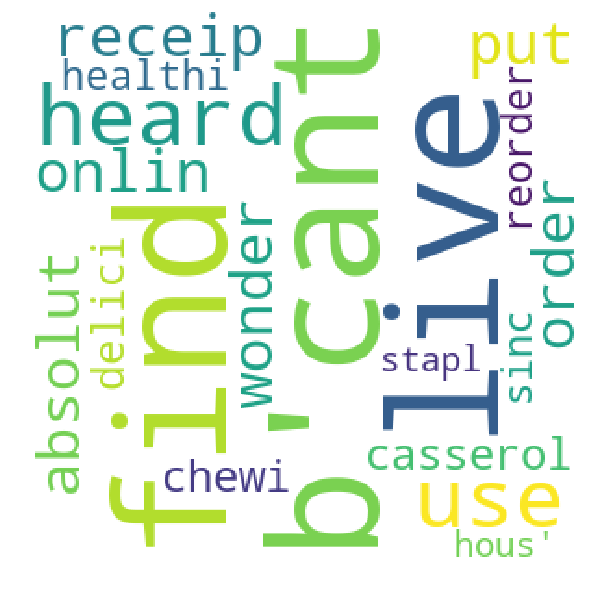

---------------------------------------------------------------------------------------------------
Review 2 : b'best green tea outsid japan good greenish color smooth tast price konacha sushi bar style green tea price cheaper bought direct bulk yamamotoyama'


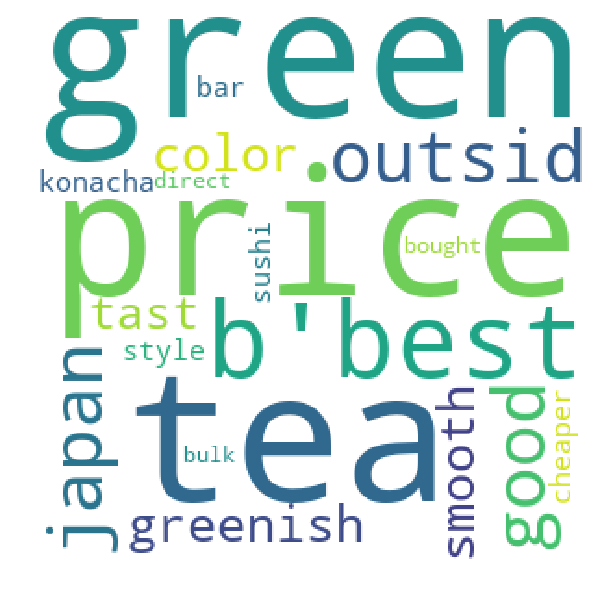

---------------------------------------------------------------------------------------------------


In [230]:
print("cluster1 : \n")
count=1
for review in clus1[200:202]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

cluster3 : 

Review 1 : b'nice coffe good price flavor buy tryid anoth hazelnut coffe favorit brand local supermarket charg'


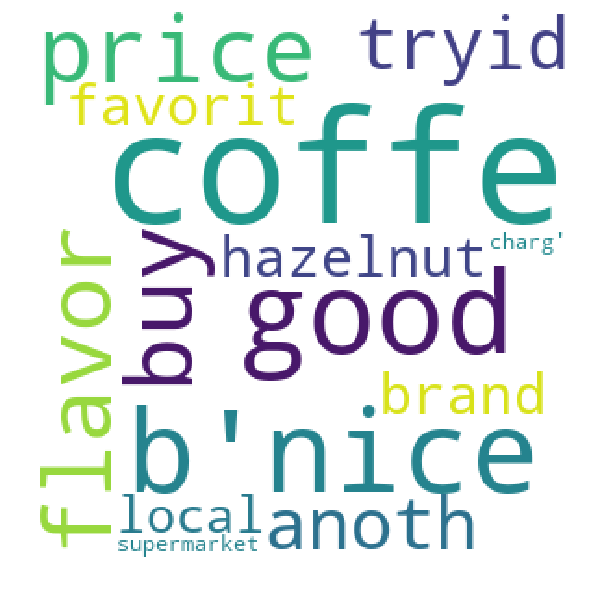

---------------------------------------------------------------------------------------------------
Review 2 : b'bought like strong coffe figur must merit hawk put name not disappoint great bold flavor right hint bitter pour rich duski brown strong first time made new coffe maker auster teuton use ad far much water normal coffe might water oblivion cpt hawk coffe still deliv promis smoki smooth made strong like kick face dinosaur help morn still goe smooth tast great price coffe definit punch weight cost less compar dark italian roast come shini tin opinion coffe drinker person wish amazon carri whole bean grind littl bit coars french press'


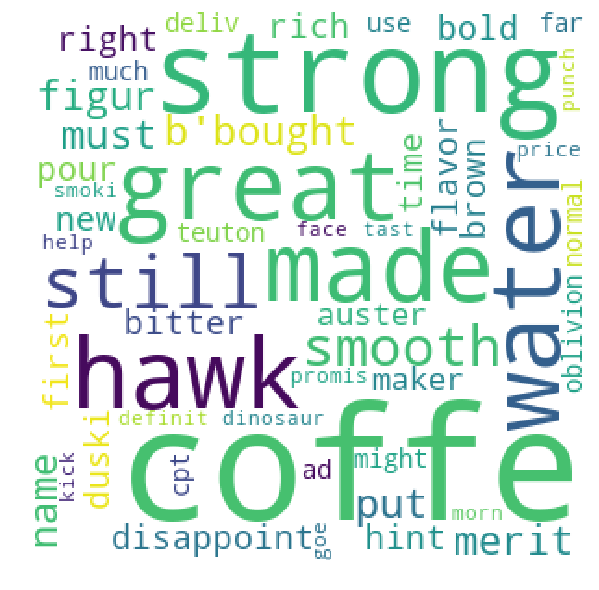

---------------------------------------------------------------------------------------------------


In [231]:
print("cluster3 : \n")
count=1
for review in clus3[200:202]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# TFIDF-W2V

In [234]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████████| 5000/5000 [00:05<00:00, 962.41it/s]


5000
300
Wall time: 5.2 s


In [235]:
%%time
Alogo2 = Hierarchical_clust2.fit(sent_vectors)

Wall time: 7.88 s


In [236]:
clus1,clus2=clusters2(Alogo2)

cluster1 : 

Review 1 : b'simpli love dress salad alway talk want know type dress use cant find store anymor order amazon com without problem howev notic longer stock hope temporari situat loyal custom cgf'


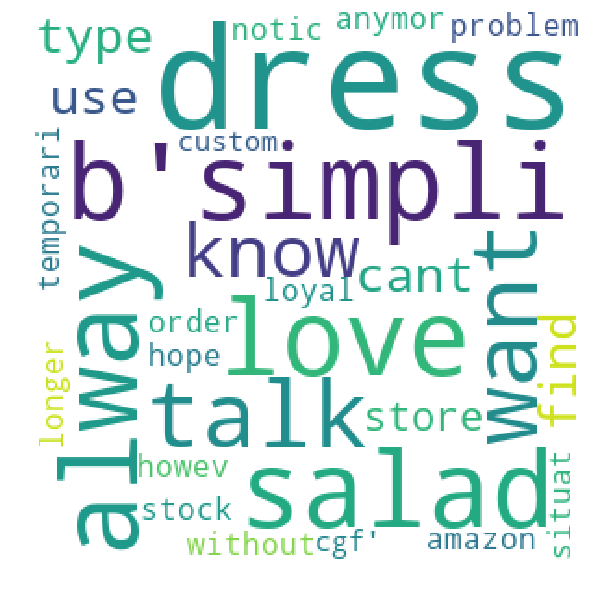

---------------------------------------------------------------------------------------------------
Review 2 : b'use product take quick teip town microwav eat straight amk great instant nacho use pour bowl hot chili like give littl extra flavor'


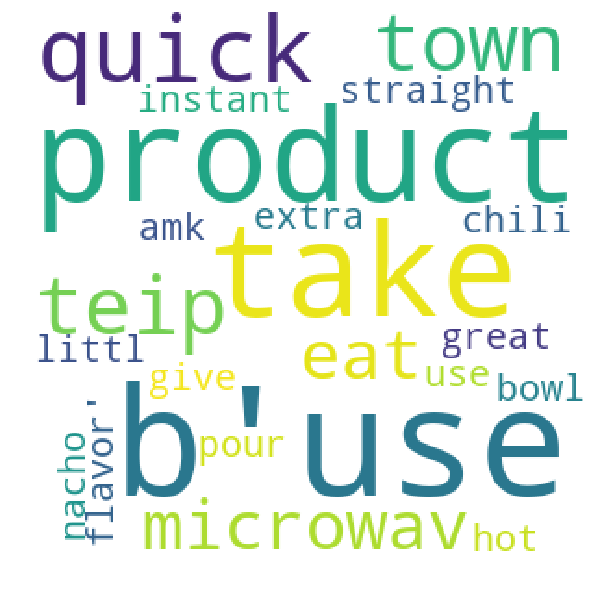

---------------------------------------------------------------------------------------------------


In [237]:
print("cluster1 : \n")
count=1
for review in clus1[50:52]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

In [238]:
%%time
Alogo5 = Hierarchical_clust5.fit(sent_vectors)

Wall time: 7.8 s


In [239]:
clus1,clus2,clus3,clus4,clus5=clusters5(Alogo5)

cluster2 : 

Review 1 : b'hook cereal buy big box costco cant get enough tast benefit flax fiber content good reason eat everi morn buy not disappoint'


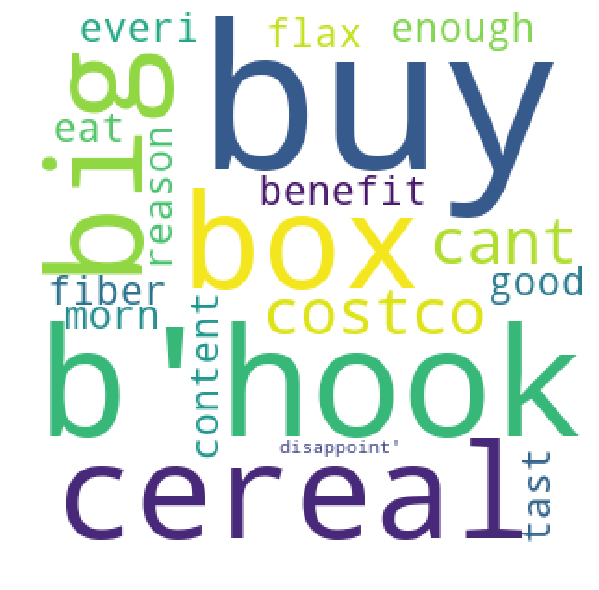

---------------------------------------------------------------------------------------------------
Review 2 : b'browni moist flavor fact good son friend ate whole pan cool knew'


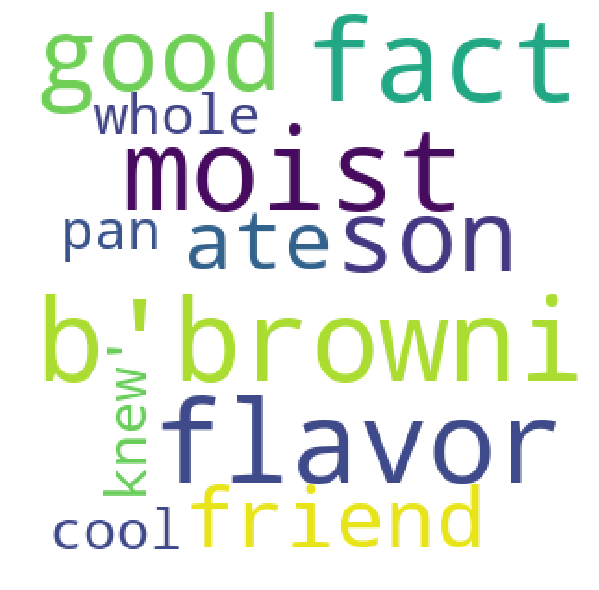

---------------------------------------------------------------------------------------------------


In [240]:
print("cluster2 : \n")
count=1
for review in clus2[50:52]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

cluster4 : 

Review 1 : b'tazo calm herbal infus nice chamomil tea tast chamomil flavor not unpleas hard pin besid chamomil general not big fan tea flavor ad prefer subtl authent tast real thing ingredi calm chamomil flower hibiscus flower spearmint lemongrass rose petal blackberri leav safflow peppermint sarsaparilla lemon balm licoric natur flavor tazo interest compani make super premium tea social respons base portland motto reincarn tea tazo own starbuck web site fun quirki focus definit worth check unclear though web site mani ingredi organ kosher use natur flavor word seem littl vagu super premium tea paper tea packet tazo write sooth blend chamomil blossom relax herb web site tazo describ flavor profil calm creami floral minti toasti sweet name gentl impli tazo calm love floral bouquet flavor distinct toasti note natur sweet nice light way smooth finish tazo describ aroma minti hay like rose dont tast various flavor tast chamomil fine not overwhelm artifici tast sever tazo tea i

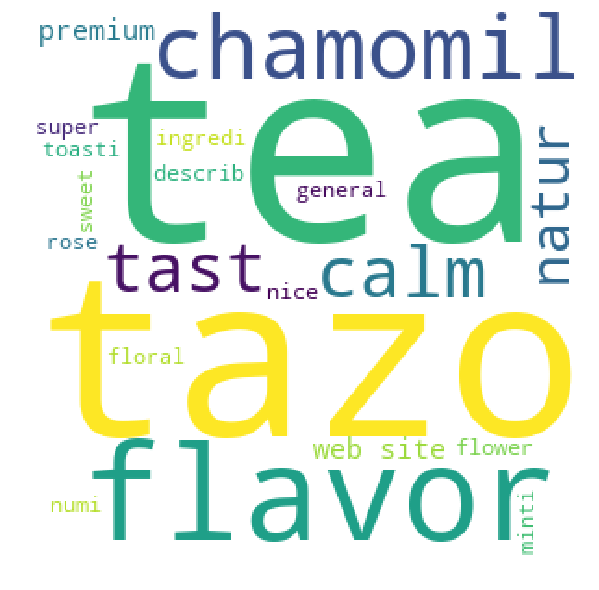

---------------------------------------------------------------------------------------------------
Review 2 : b'friend told love yummyearth lollipop bought bag share work everyon love like crazi almost done day realli pack great flavor differ candi fruiti real tast not like over sugari fake flavor regular candi awesom tast pretti cool organ'


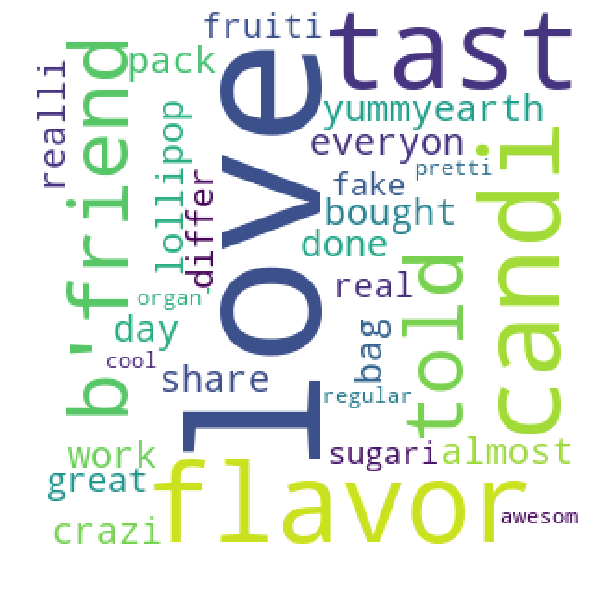

---------------------------------------------------------------------------------------------------


In [242]:
print("cluster4 : \n")
count=1
for review in clus4[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# ---------------------------------: DBSCAN :---------------------------------------

Below code is got from the website for finding the best eps , so code has been shiltghly modifed
https://github.com/vincewide/ML_scheduler/blob/master/DBSCAN.py

In [15]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [67]:
def Get_distanceMean(points,minPts,previous_distanceMean):

    """
    Method used to calculate the mean of the neighbors distances
    
    :param points: List containing the training-points you want to use
    :param minPts: Minimum number of points to be considered a cluster
    :param previous_distanceMean: The previous mean of the distances

    :return: Average distance between the points

    """

    if (minPts < len(points)):

        nbrs = NearestNeighbors(n_neighbors=minPts).fit(points)
        distances, indices = nbrs.kneighbors(points)
        d_mean = distances.mean()
        return d_mean

    else:
        return previous_distanceMean




def KNNdist_plot(points,minPts):

    """
    
    Calculate where the slope of the kNNdistPlot is higher than a user-defined
       value while plotting the K-NN distance 
           with respect to the amount of training data

   :param points: List containing the points you want to use
   :param minPts: Minimum number of points to be considered a cluster
   :return: The most optimal parameter-values i.e Knee point values

   """

    epsPlot = []
    current_distanceMean = previous_distanceMean = 0
    knee_value = knee_found = 0
    n_trainingData =0

    for i in range (0,len(points),5):

        current_distanceMean = Get_distanceMean(points[i:],
                                            minPts,previous_distanceMean)
        df = current_distanceMean - previous_distanceMean
        #print("DF",df)

        if (df > 0.001 and i > 1 and knee_found == 0):
            knee_value = current_distanceMean
            knee_found = 1
            n_trainingData = i
            #print("n_trainingData :-",n_trainingData)

        epsPlot.append( [i,current_distanceMean] )
        previous_distanceMean = current_distanceMean


    #Plot the kNNdistPlot
    for i in range(0, len(epsPlot)):
                plt.scatter(epsPlot[i][0],epsPlot[i][1],c='r',s=3,marker='o')

    plt.axhline(y=knee_value, color='g', linestyle='-')
    plt.axvline(x=n_trainingData , color='g', linestyle='-')
    plt.title("-----Best EPS for DBscan------")
    plt.grid()
    plt.show()
    #plt.grid()

    print("Knee value: x=" + str(n_trainingData) + " , y=" + str(knee_value))

    return knee_value

# Avg w2v

In [59]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in food1_sample['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [60]:
%%time
#np.seterr(divide='ignore', invalid='ignore')
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 997.95it/s]


Wall time: 1.01 s


In [61]:
sent_vectors=np.array(sent_vectors)

In [62]:
np.isnan(sent_vectors).any()

False

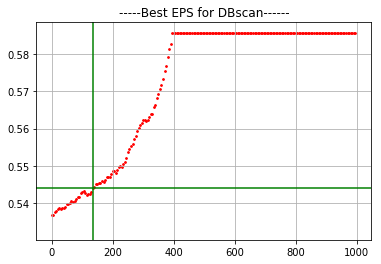

Knee value: x=135 , y=0.5440939453227848
Wall time: 6.72 s


In [68]:
%%time
kneeValue =KNNdist_plot(sent_vectors, minPts=600)

In [69]:
%%time
dbscan = DBSCAN(eps=kneeValue,min_samples = 600,n_jobs=-1)
dbscan.fit(sent_vectors)

Wall time: 1.92 s


In [71]:
def clusters2(aolgo):
    clus1 = []
    clus2 = []
    for i in range(aolgo.labels_.shape[0]):
        if aolgo.labels_[i] == 0:
            clus1.append(CLEANED_TEXT[i])
        else :
            clus2.append(CLEANED_TEXT[i])
    return clus1,clus2

In [70]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0, -1, -1

In [205]:
clus1,clus2=clusters2(dbscan)

cluster2 : 

Review 1 : b'frank dilut mild hot sauc contain cayenn pepper along fair heavi dose vinegar look hot sauc liber appli frank might hit mark assum like much vinegar dilut natur frank make quit forgiv howev could purchas small bottl tabasco dilut achiev result better yet buy small bottl smallest size huy fong sriracha chili sauc add lot water youll dilut hot sauc tast much better fraction cost frank name hard roll tongu huy fong sriracha chili sauc better tabasco frank make gallon dilut hot sauc fraction price frank charg tast far better least bit curious suggest tri someth els might pleasant surpris obvious review encompass myriad tast amazon custom review suggest altern might appeal other tri one huy fong sriracha hot chili sauc sauc consider heat nice balanc bit sweet combin hint garlic virtual everi supermarket carri look asian section cholula origin hot sauc featur fine blend pepper medium hot readili avail look mexican section tapatio hot salsa picanta anoth wide distrib

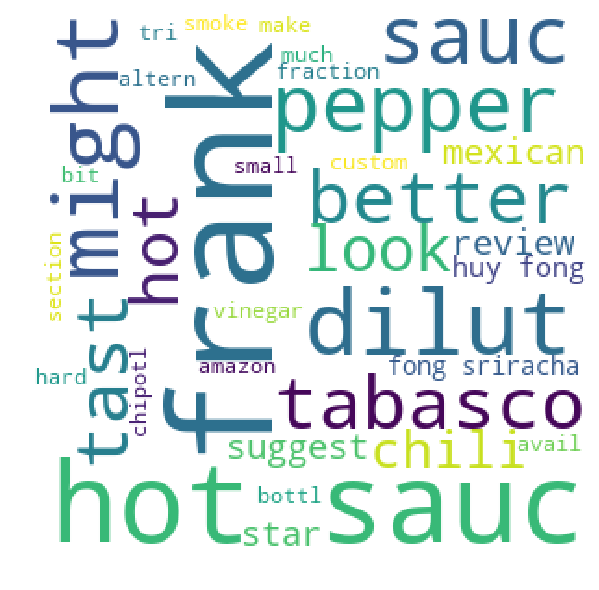

---------------------------------------------------------------------------------------------------
Review 2 : b'high skeptic bought stuff ive like tast thai product ive bought store wasnt sure would translat microwav product though noodl cook realli nice although import stir well two cook phase sauc flavor thicken nice cool bit spici like wouldnt think would spici mani peopl realli dislik spici food might not case probabl wouldnt even consid product downsid product fair small contain huge that accomod noodl cook cook noodl take much less space portion decent lunch may want cook two dinner stuff addict like asian crack order case'


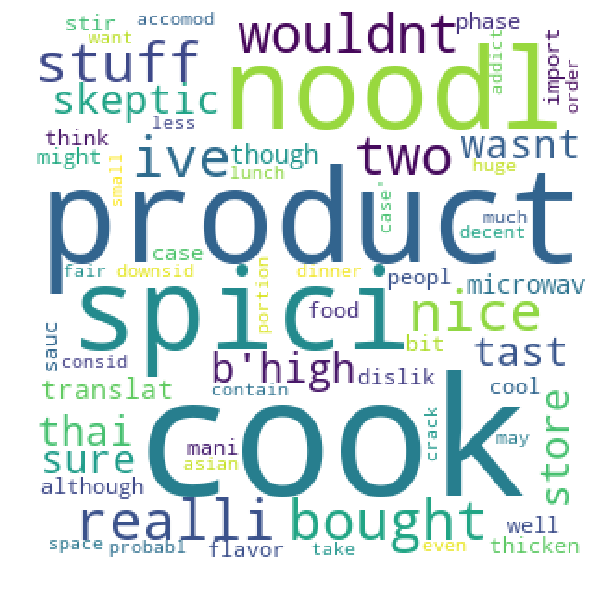

---------------------------------------------------------------------------------------------------


In [206]:
print("cluster2 : \n")
count=1
for review in clus1[10:12]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

In [207]:
%%time
dbscan = DBSCAN(eps=.8,min_samples = 600,n_jobs=-1)
dbscan.fit(sent_vectors)

Wall time: 1.95 s


In [208]:
clus_new1,clus_new2=clusters2(dbscan)

cluster2 : 

Review 1 : b'tri sever differ italian coffe claim best coffe avail caff kimbo far best caff kimbo rich dark coffe make excel espresso especi moka stove top espresso pot rich full bodi depth lack brand well worth tri'


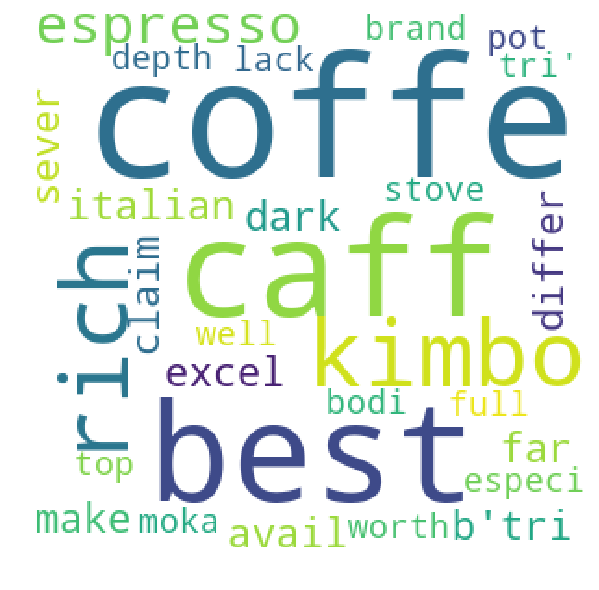

---------------------------------------------------------------------------------------------------
Review 2 : b'wait although took happen glad final see flavor coffe pod varieti tast fake sometim oili flavor ad opposit tast quit real funni chemic tast tast natur clean welcom addit not anyon could ever get bore regular coffe product ad nice varieti'


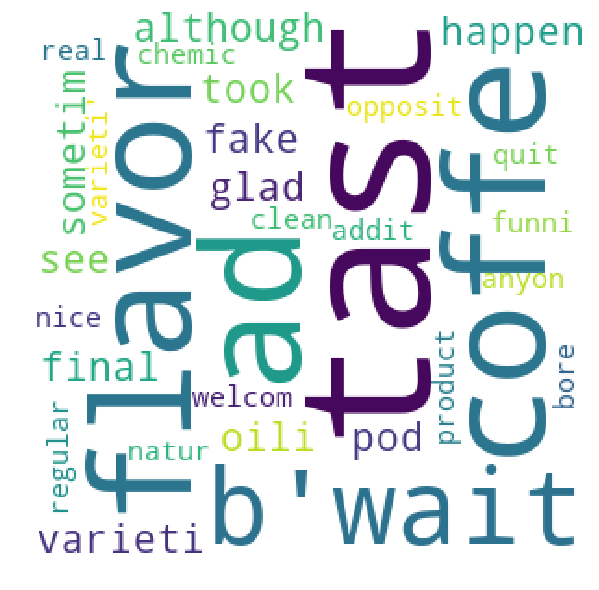

---------------------------------------------------------------------------------------------------


In [214]:
print("cluster2 : \n")
count=1
for review in clus_new1[5:7]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# TFIDF W2v

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() #Using bi-grams
tfidf_vec = tfidf.fit_transform(food1_sample['Text'].values)

In [217]:
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

In [218]:
%%time
# TF-IDF weighted Word2Vec
# tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model.wv[word]
            #print(vec)
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*sent.count(word)
            #print()
            sent_vec += (vec * tf_idf)
            #print(sent_vec)
            #print(tfidf)
            #print(sent_vec)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1  

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 607.87it/s]


Wall time: 1.65 s


In [220]:
tfidf_sent_vectors=np.array(tfidf_sent_vectors)

In [221]:
np.isnan(tfidf_sent_vectors).any()

False

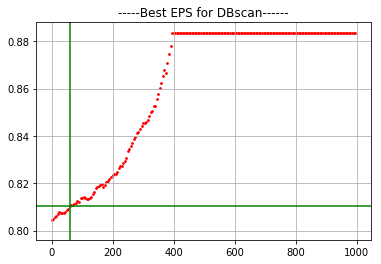

Knee value: x=60 , y=0.8101766878646782
Wall time: 6.62 s


In [224]:
%%time
kneeValue =KNNdist_plot(tfidf_sent_vectors, minPts=600)

In [223]:
%%time
dbscan = DBSCAN(eps=kneeValue,min_samples = 600,n_jobs=-1)
dbscan.fit(sent_vectors)

Wall time: 1.94 s


In [225]:
clus1,clus2=clusters2(dbscan)

cluster1 : 

Review 1 : b'tri sever differ italian coffe claim best coffe avail caff kimbo far best caff kimbo rich dark coffe make excel espresso especi moka stove top espresso pot rich full bodi depth lack brand well worth tri'


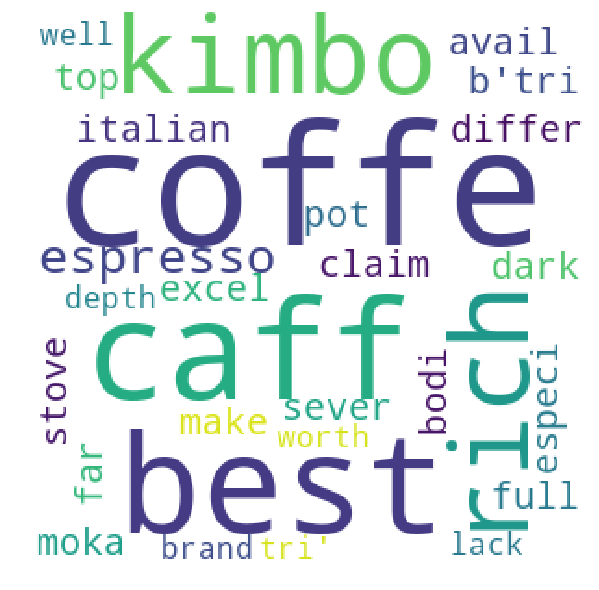

---------------------------------------------------------------------------------------------------
Review 2 : b'wait although took happen glad final see flavor coffe pod varieti tast fake sometim oili flavor ad opposit tast quit real funni chemic tast tast natur clean welcom addit not anyon could ever get bore regular coffe product ad nice varieti'


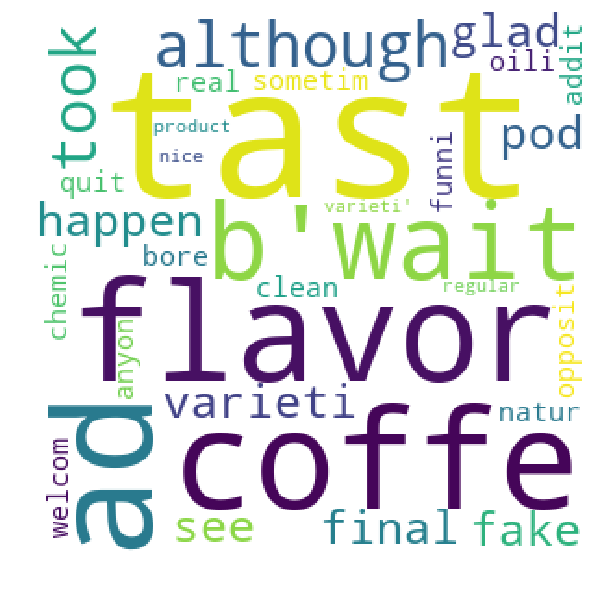

---------------------------------------------------------------------------------------------------


In [226]:
print("cluster1 : \n")
count=1
for review in clus1[5:7]:
    print("Review {} : {}".format(count,review))
    print_word_cloud(review)
    print("---------------------------------------------------------------------------------------------------")
    count +=1

# Conclusion:-

1). In the clustering alogorithm there is no ground truth value (y) so all the cluster has been formed by the word on the review .

2). Kmeans clustering alogorith has a hypermeter n_clusters, so we can easily tune the hyperparameter for perfect cluster .

3). In AgglomerativeClustering we can choose the number of cluster we want , but it is not showing great result , we go from 2 cluster to 5 cluster , increaing the number of cluster , we are getting more accurate cluster .

3). DBSCAN taking long time to find the best eps , for 1l datapoint it took nearly 17hrs :( . After finding the preoper EPS by elbow method we can able to see DBSCAN is forming the cluster in shlighty correct .

4). Slight change in Eps , we are getting very weired cluster .

5). As per my Observation k-means clustering is forming more accurate cluster in AVGW2V and TFIDFW2V , which has much more meaning than other clustering.

6). In DBSCAN clustering the most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for epsilon.